In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("music_features.csv")
dfVar = pd.read_csv("music_features_updated.csv")
dfGenre = df['genre']
df = df.drop(columns = ['filename', 'genre'])
dfVar = dfVar.drop(columns = ['filename', 'genre'])



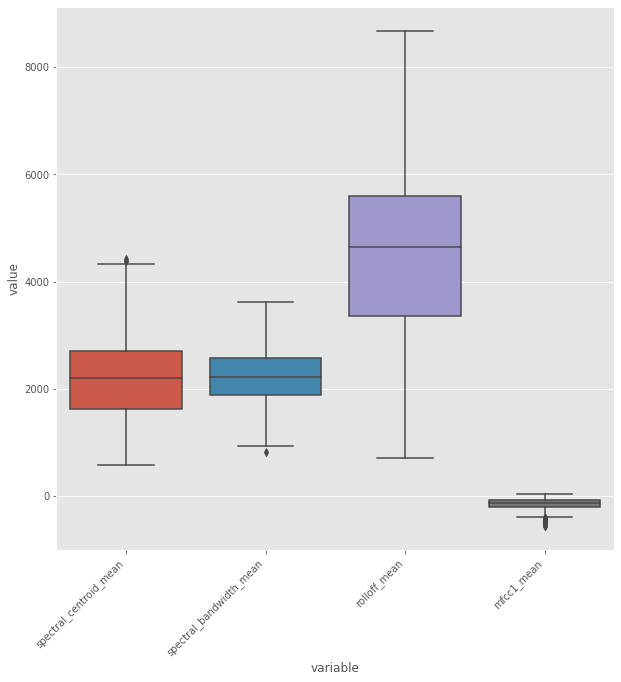

In [3]:
df.describe()
bigOnes = df.iloc[:, [1,2,3,6]]
fig, ax = plt.subplots(1,1, figsize=(10,10))
chart = sns.boxplot(x="variable", y="value", data=pd.melt(bigOnes))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

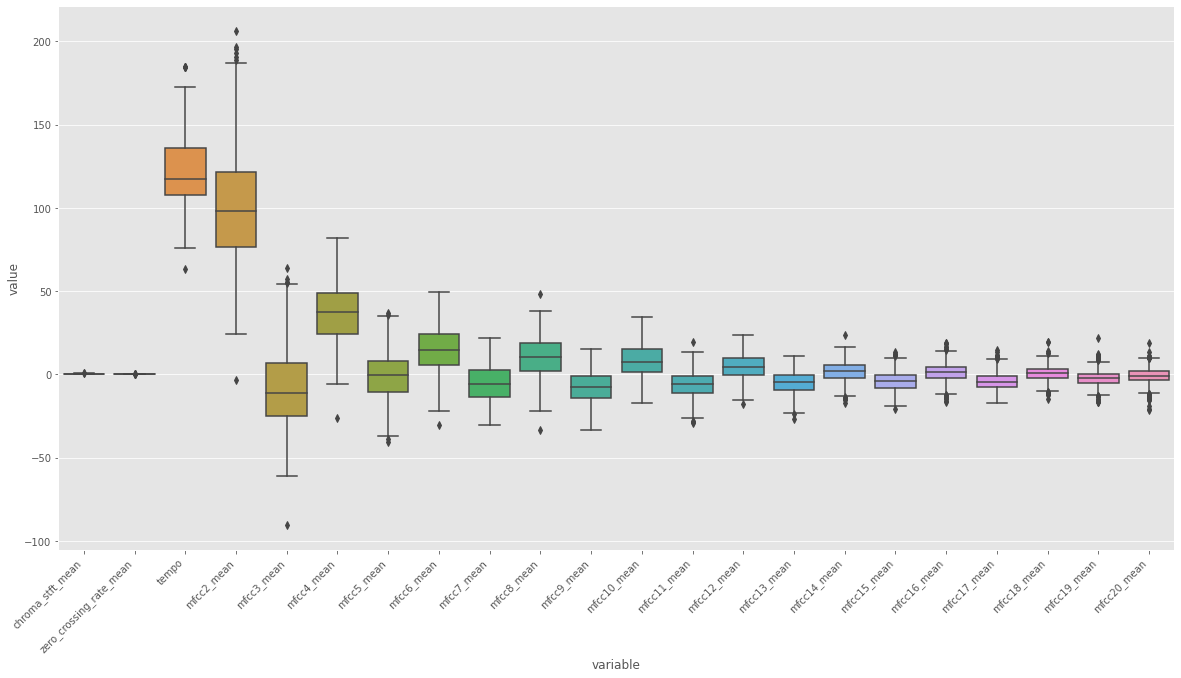

In [7]:
smallOnes = df.iloc[:, [0,4,5, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
fig, ax = plt.subplots(1,1, figsize=(20,10))
chart = sns.boxplot(x="variable", y="value", data=pd.melt(smallOnes))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [5]:
pca = PCA(2).fit_transform(df)
pcaWithVar = PCA(2).fit_transform(dfVar)
genres = dfGenre.to_numpy()

Text(0.5, 1.0, 'PCA Analysis')

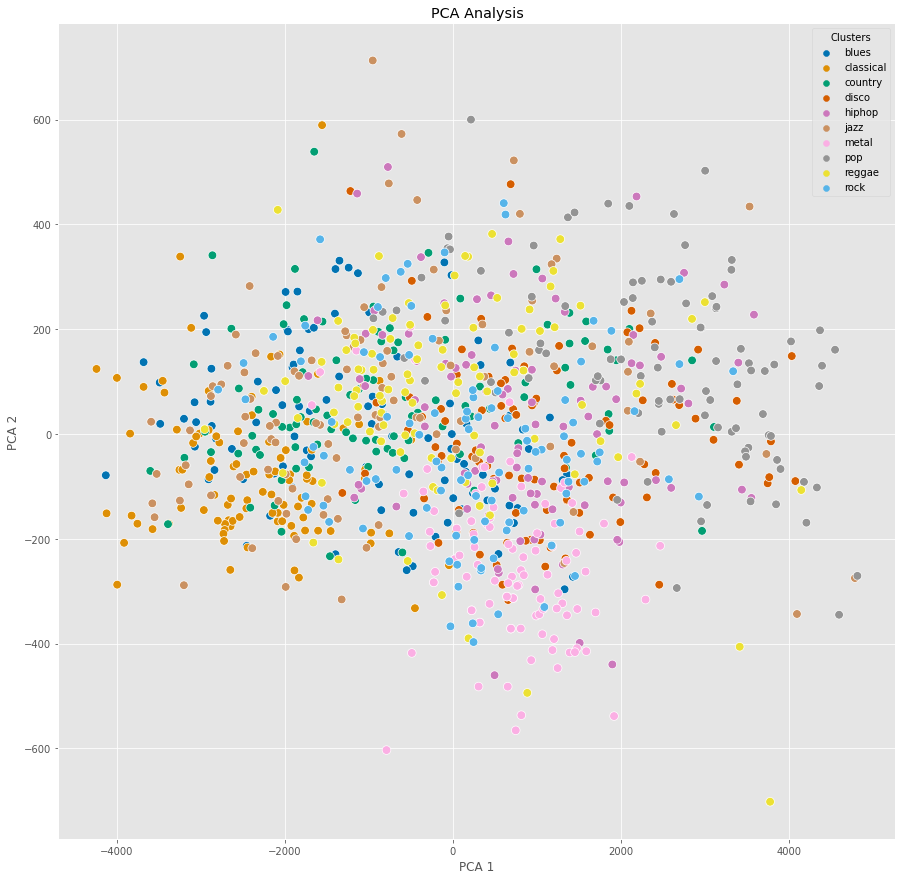

In [8]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
dfPca = pd.DataFrame(pca, columns = ['PCA 1', 'PCA 2'])
dfPca['Clusters'] = genres
sns.scatterplot(data = dfPca, x = 'PCA 1', y = 'PCA 2', hue = 'Clusters', palette = 'colorblind', s = 75).set_title("PCA Analysis")

Text(0.5, 1.0, 'PCA Analysis')

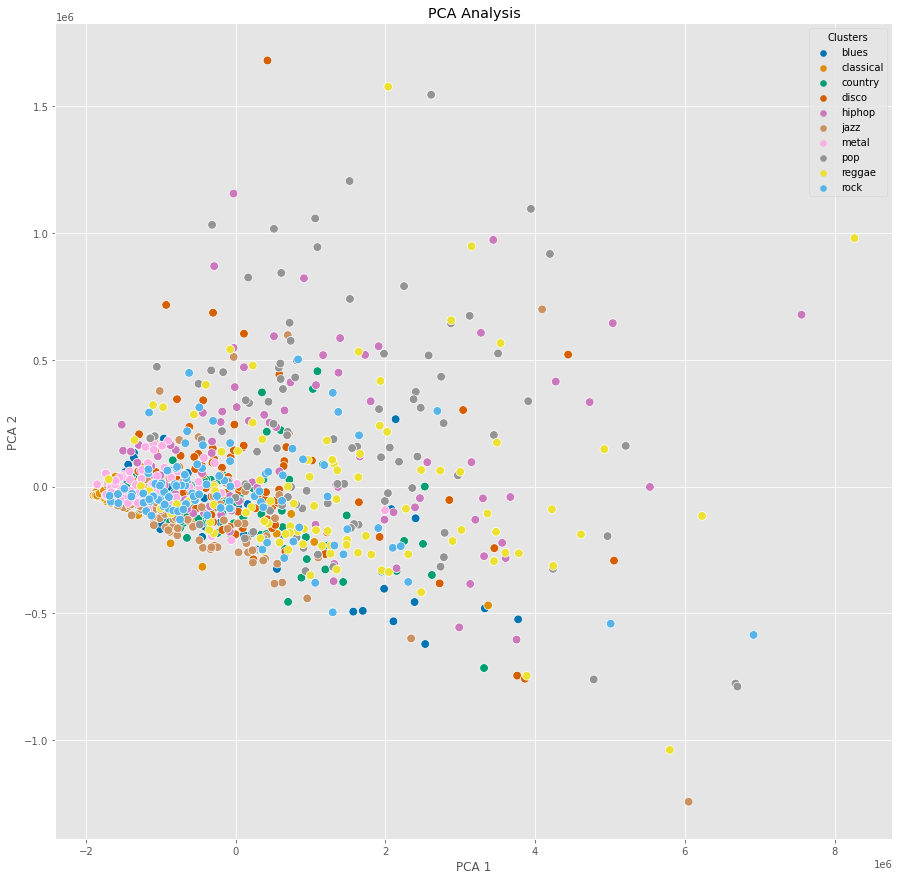

In [10]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
dfPcaVar = pd.DataFrame(pcaWithVar, columns = ['PCA 1', 'PCA 2'])
dfPcaVar['Clusters'] = genres
sns.scatterplot(data = dfPcaVar, x = 'PCA 1', y = 'PCA 2', hue = 'Clusters', palette = 'colorblind', s = 75).set_title("PCA Analysis")

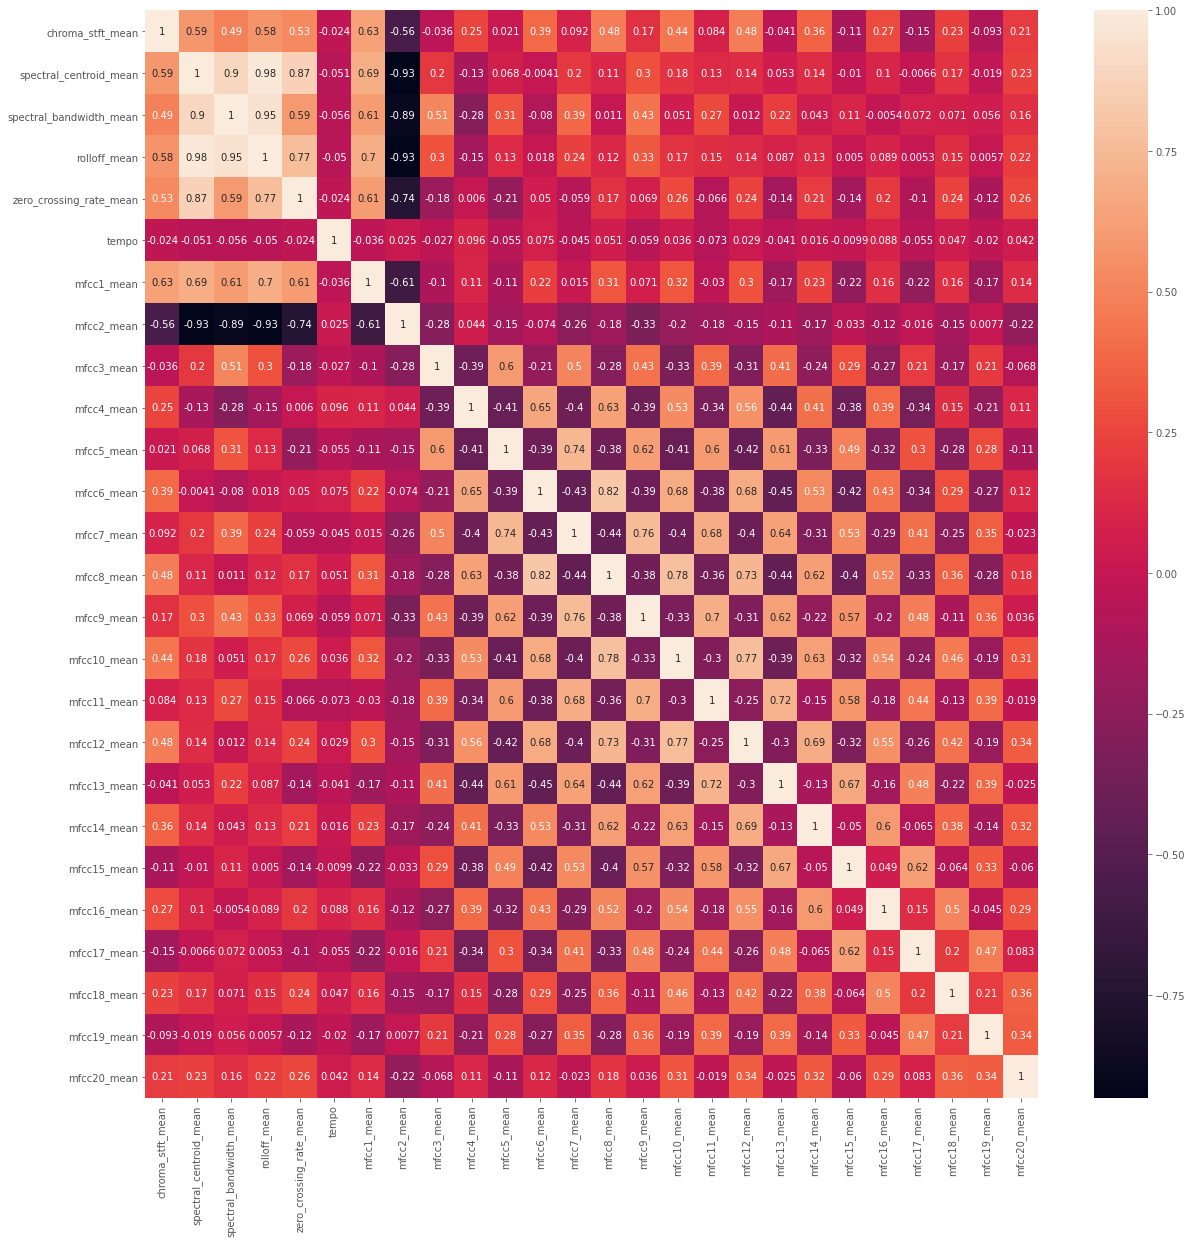

In [11]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True)
plt.show()